In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('titanic_train.csv')
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

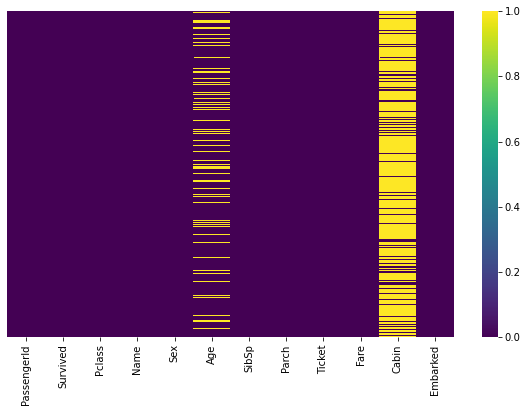

In [4]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),cmap ='viridis', yticklabels=False)

In [5]:
# age 
177/891*100

19.865319865319865

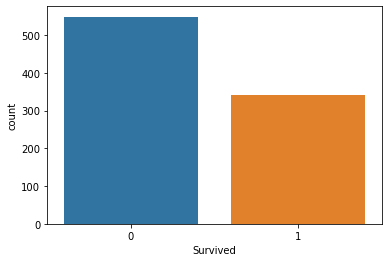

In [6]:
sns.countplot(x= 'Survived', data =data)

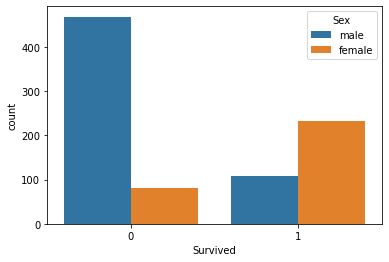

In [7]:
# for categorical and categorical data
sns.countplot(x = 'Survived' ,hue ='Sex',data=data )

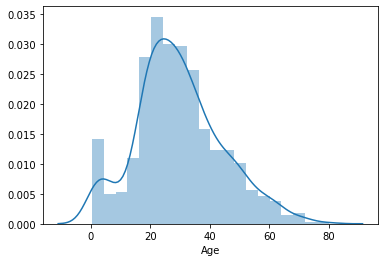

In [8]:
sns.distplot(data['Age'])

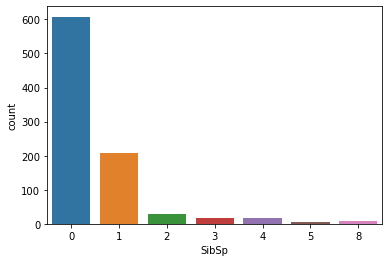

In [9]:
sns.countplot(x = 'SibSp',data=data)

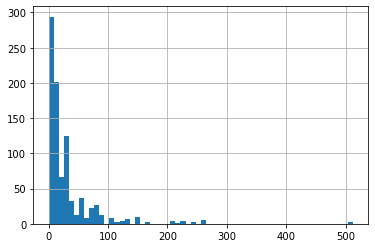

In [10]:
data['Fare'].hist(bins=60)

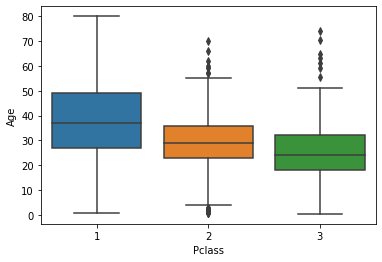

In [11]:
sns.boxplot(x='Pclass',y='Age',data=data)

In [12]:
def calculate_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        elif Pclass ==3:
            return 24
    else :
            return Age

In [13]:
data['Age']= data[['Age', 'Pclass']].apply(calculate_age,axis =1)

In [14]:
data['Age'].isnull().sum()

0

In [15]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
data.drop(['PassengerId','Name','Cabin','Ticket'],axis =1, inplace =True)

In [19]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)

In [21]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [23]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [24]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [25]:
# data,sex,embark
data = pd.concat([data,sex,embark],axis =1)

In [27]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [28]:
data.drop(['Sex','Embarked'],inplace=True, axis =1)

In [29]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [30]:
from sklearn.linear_model import LogisticRegression

In [38]:
log_reg_model = LogisticRegression(max_iter=1000)

In [33]:
x = data.drop('Survived',axis =1) 
y = data['Survived']

In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3)

In [39]:
log_reg_model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [48]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [43]:
y_pred = log_reg_model.predict(x_test)

In [44]:
print(confusion_matrix(y_test,y_pred))

[[135  30]
 [ 25  78]]


In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       165
           1       0.72      0.76      0.74       103

    accuracy                           0.79       268
   macro avg       0.78      0.79      0.79       268
weighted avg       0.80      0.79      0.80       268



In [50]:
score = accuracy_score(y_test,y_pred)
score

0.7947761194029851